# Test for suitability of Unsupervised Method

In [1]:
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.metrics import confusion_matrix

import data_processing as dp 
import model_selection as ms 
import model_files as fm
import graph_production as gp

from scapy.all import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time

from sklearn.cluster import * 
from sklearn.mixture import GaussianMixture
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

np.random.seed(0)

/opt/anaconda3/lib/python3.8/site-packages/scapy/layers/ipsec.py:471: CryptographyDeprecationWarning: Blowfish has been deprecated
  cipher=algorithms.Blowfish,
/opt/anaconda3/lib/python3.8/site-packages/scapy/layers/ipsec.py:485: CryptographyDeprecationWarning: CAST5 has been deprecated
  cipher=algorithms.CAST5,


In [2]:
from mycolorpy import colorlist as mcp

color1=mcp.gen_color(cmap="gnuplot2",n=12)
print(color1)

['#000000', '#00005c', '#0000b8', '#1000ff', '#5b00ff', '#a312ed', '#eb40bf', '#ff6e91', '#ff9e61', '#ffcc33', '#fffa05', '#ffffff']


In [3]:
trainFile = rdpcap('data/evaluation/training45m.pcapng')
labelFile = fm.toList('data/evaluation/training45mClass.txt')

x60s, y60s, p = dp.timestamps(trainFile, labelFile, 60)
x45s, y45s, p = dp.timestamps(trainFile, labelFile, 45)
x30s, y30s,p  = dp.timestamps(trainFile, labelFile, 30)
x15s, y15s, p = dp.timestamps(trainFile, labelFile, 15)
x10s, y10s, p = dp.timestamps(trainFile, labelFile, 10)
x5s, y5s,n = dp.timestamps(trainFile, labelFile, 5)
x2s, y2s,m = dp.timestamps(trainFile, labelFile, 2)
x1s, y1s,m = dp.timestamps(trainFile, labelFile, 1)
#xhalfs, yhalfs = dp.timestamps(trainFile, labelFile, 0.5)


151535
151535
151535
151535
151535
151535
151535
151535


In [4]:
x60s

,Total Bytes,Average Packet Size,Smallest Packet,Largest Packets,25%,50%,75%,No Sources,No of Destinations,No of IP srcs,No of IP dsts,unique addresses,No TCP Flags,No Protocols,Packet Count,Average Inter Arrival Time
0,165551,99.489784,42,450,60.0,83.0,108.0,9,12,7,10,16,2,7,1664,0.03620126081730769230769230769
1,177498,106.797834,46,450,60.0,83.0,108.0,9,12,7,10,16,2,7,1662,0.03610429903730445246690734055
2,188638,104.915462,42,450,60.0,83.0,108.0,10,18,8,14,20,2,8,1798,0.03337815461624026696329254727
3,597592,79.140776,42,450,73.0,73.0,73.0,9,13,8,11,16,4,8,7551,0.007946322473844523904118659780
4,1380834,67.731103,42,450,60.0,60.0,73.0,9,14,7,11,17,7,8,20387,0.002955224554863393338892431451
5,181133,106.423619,42,450,60.0,83.0,108.0,9,14,7,10,18,2,8,1702,0.03527950352526439482961222092
6,163877,100.230581,46,450,60.0,83.0,108.0,9,12,7,10,16,2,7,1635,0.03669986911314984709480122324
7,189841,105.175069,42,450,60.0,83.0,108.0,10,18,8,15,20,2,8,1805,0.03346349252077562326869806094
8,178564,106.161712,42,450,60.0,83.0,108.0,9,12,7,10,16,2,7,1682,0.03567330023781212841854934602
9,170079,102.828900,46,450,60.0,83.0,108.0,9,12,7,10,16,2,7,1654,0.03627711305925030229746070133


In [5]:
labels = [y60s, y45s, y30s, y15s, y10s, y5s, y2s, y1s]

x_data = [x60s, x45s, x30s, x15s, x10s, x5s, x2s, x1s]

In [6]:
def confusion_matrix_try(predicted, actual, alg):
    cm = confusion_matrix(actual, predicted)
    df_cm = pd.DataFrame(cm, index = ["False", "True"],
                  columns = ["False", "True"])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    title = "Confusion matrix for best " + str(alg)
    plt.title(title)
    plt.show()

def match_percentage(list1, actual, alg="current", graph=False):

    if len(list1) != len(actual):
        raise ValueError("Both lists must have the same length.")
    if graph == True:
        confusion_matrix_try(list1, actual, alg)
    num_matches = sum(1 for x, y in zip(list1, actual) if x == y)
    return num_matches / len(list1)

	

In [7]:
methods = ["kmeans", 'spectral', 'agglo', 'gm',  'bisect']
def evaluteUnsupervised(x_data, labels):
	performance = []
	for i in range(len(x_data)):
		X = x_data[i]
		Y = labels[i]
		results = []
		# Scale the data to have zero mean and unit variance
		scaler = StandardScaler()
		X = scaler.fit_transform(X)
		# Define clustering algorithms
		kmeans = KMeans(n_clusters=2, random_state=42)
		spectral = SpectralClustering(n_clusters=2)
		agglo = AgglomerativeClustering(n_clusters=2)
		gm = GaussianMixture(n_components=2, random_state=0)
		bisect_means = BisectingKMeans(n_clusters=2, random_state=0)

		# Fit and predict using each algorithm
		kmeans_labels = kmeans.fit_predict(X)
		spectral_labels = spectral.fit_predict(X)
		agglo_labels = agglo.fit_predict(X)
		gm_labels = gm.fit_predict(X)
		bisect_labels = bisect_means.fit_predict(X)

		results.append(match_percentage(kmeans_labels, Y))
		results.append(match_percentage(spectral_labels, Y))
		results.append(match_percentage(agglo_labels, Y))
		results.append(match_percentage(gm_labels, Y))
		results.append(match_percentage(bisect_labels, Y))
	
		performance.append(results)
	return(performance)

In [8]:
testFile = rdpcap('data/timestamps/anomaliesTest.pcapng')
testLabelFile = fm.toList('data/timestamps/anomaliesTestClass.txt')

atx30, aty30,n  = dp.timestamps(testFile, testLabelFile, 30)
atx10, aty10,n  = dp.timestamps(testFile, testLabelFile, 10)

atx5, aty5, n = dp.timestamps(testFile, testLabelFile, 5)
atx1, aty1,n  = dp.timestamps(testFile, testLabelFile, 1)
atx05, aty05 ,n = dp.timestamps(testFile, testLabelFile, 0.5)
atx02, aty02,n  = dp.timestamps(testFile, testLabelFile, 0.2)


13224
13224
13224
13224
13224
13224


## Clustering Methods

In [9]:
# 28 MINUTE RUNNNING TIME
performance = evaluteUnsupervised(x_data, labels)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

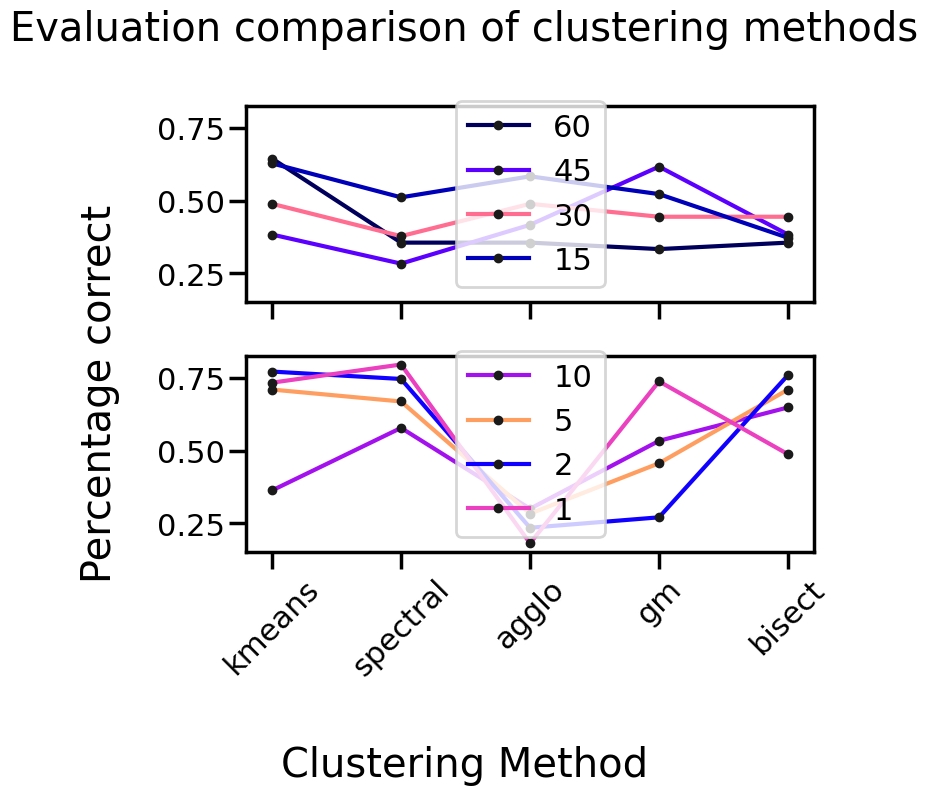

In [10]:
size_times = [60, 45, 30, 15, 10, 5, 2, 1]
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(8,8))
x =np.arange(1, len(methods)+1).tolist()
axs[0].plot(x, performance[0], color=color1[1],ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, performance[1], color=color1[4], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, performance[2], color=color1[7], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, performance[3], color=color1[2], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, performance[4], color=color1[5], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, performance[5], color=color1[8], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, performance[6], color=color1[3], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, performance[7], color=color1[6], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
#axs[2].plot(x, performance[8], color=color1[9], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')

axs[0].legend(size_times[:4])
axs[1].legend(size_times[4:])
#axs[2].legend(size_times[6:])
plt.xticks(x, methods, rotation=45)

fig.supxlabel('Clustering Method')
fig.supylabel("Percentage correct")
fig.suptitle('Evaluation comparison of clustering methods')
fig.tight_layout()

In [11]:
performance_df = pd.DataFrame(data=performance, columns=methods)


In [12]:
performance_df

,kmeans,spectral,agglo,gm,bisect
0,0.644444,0.355556,0.355556,0.333333,0.355556
1,0.383333,0.283333,0.416667,0.616667,0.383333
2,0.488889,0.377778,0.488889,0.444444,0.444444
3,0.627778,0.511111,0.583333,0.522222,0.372222
4,0.362963,0.577778,0.300000,0.533333,0.648148
5,0.709497,0.668529,0.283054,0.456238,0.709497
6,0.771300,0.745889,0.234679,0.270553,0.759342
7,0.733184,0.795590,0.181241,0.737668,0.487294


In [13]:
performance_df.mean(axis=0)

kmeans      0.590174
spectral    0.539446
agglo       0.355427
gm          0.489307
bisect      0.519980
dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


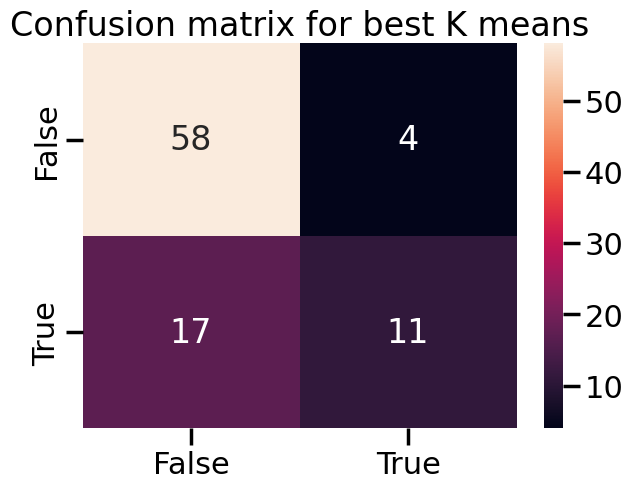

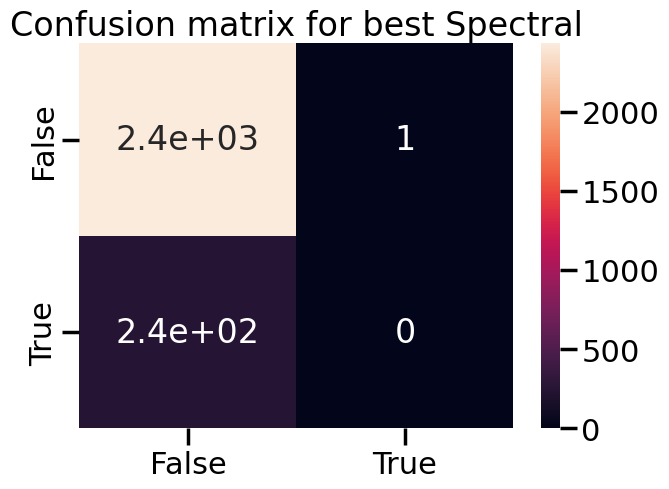

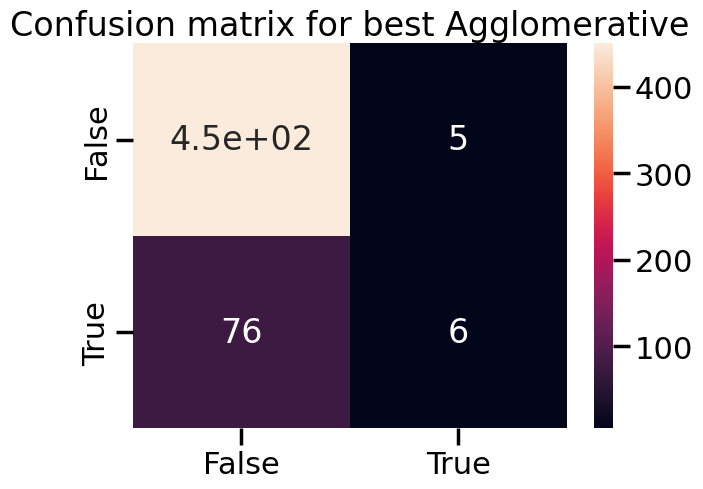

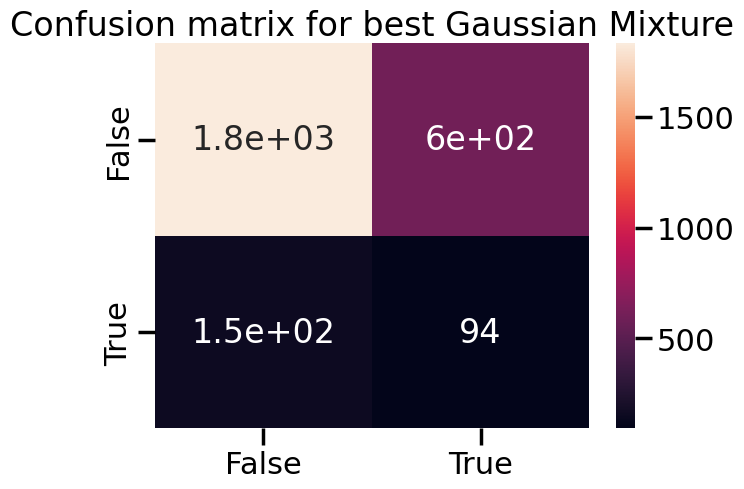

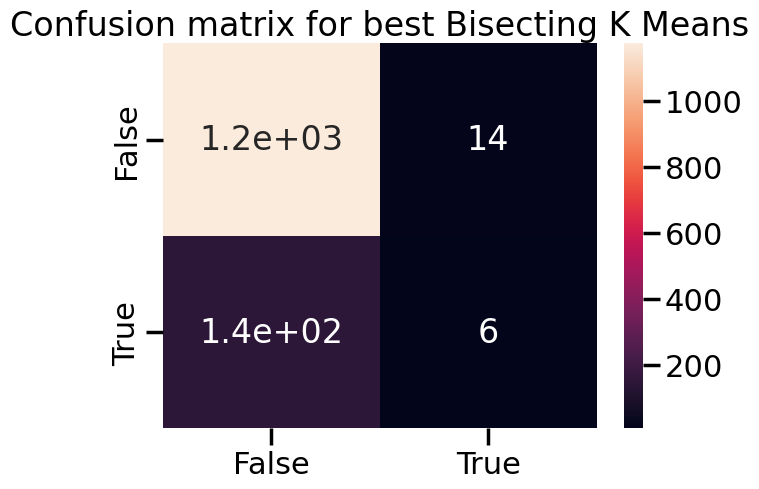

0.8819133034379671

In [ ]:
# 35 MINUTE RUNNING TIME
scaler = StandardScaler()
X = scaler.fit_transform(x30s)
# Define clustering algorithms
kmeans = KMeans(n_clusters=2, random_state=42)
# Fit and predict using each algorithm
kmeans_labels = kmeans.fit_predict(X)
match_percentage(kmeans_labels, y30s, 'K means', True)

scaler = StandardScaler()
X = scaler.fit_transform(x1s)
spectral = SpectralClustering(n_clusters=2)
spectral_labels = spectral.fit_predict(X)
match_percentage(spectral_labels, y1s, 'Spectral', True)

scaler = StandardScaler()
X = scaler.fit_transform(x5s)
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X)
match_percentage(agglo_labels, y5s, "Agglomerative",  True)

scaler = StandardScaler()
X = scaler.fit_transform(x1s)
gm = GaussianMixture(n_components=2, random_state=0)
gm_labels = gm.fit_predict(X)
match_percentage(gm_labels, y1s, "Gaussian Mixture", True)

scaler = StandardScaler()
X = scaler.fit_transform(x2s)
bisect_means = BisectingKMeans(n_clusters=2, random_state=0)
bisect_labels = bisect_means.fit_predict(X)
match_percentage(bisect_labels, y2s, "Bisecting K Means", True)


## Comparison With 2nd Training Dataset

In [14]:
trainFile = rdpcap('data/evaluation/training52Minutes.pcapng')
labelFile = fm.toList('data/evaluation/training52MinutesClass.txt')

x60s, y60s, p = dp.timestamps(trainFile, labelFile, 60)
x45s, y45s, p = dp.timestamps(trainFile, labelFile, 45)
x30s, y30s,p  = dp.timestamps(trainFile, labelFile, 30)
x15s, y15s, p = dp.timestamps(trainFile, labelFile, 15)
x10s, y10s, p = dp.timestamps(trainFile, labelFile, 10)
x5s, y5s,n = dp.timestamps(trainFile, labelFile, 5)
x2s, y2s,m = dp.timestamps(trainFile, labelFile, 2)
x1s, y1s,m = dp.timestamps(trainFile, labelFile, 1)
#xhalfs, yhalfs = dp.timestamps(trainFile, labelFile, size=0.5)

335290
335290
335290
335290
335290
335290
335290
335290


In [15]:
labels = [y60s, y45s, y30s, y15s, y10s, y5s, y2s, y1s]

x_data = [x60s, x45s, x30s, x15s, x10s, x5s, x2s, x1s]

In [16]:
#45 MINUTE RUN TIME
performance = evaluteUnsupervised(x_data, labels)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[1.77717149e-14 1.97244915e-06 1.57189963e-05]
not reaching the requested tolerance 1.5497207641601562e-06.
Use iteration 183 instead with accuracy 


In [17]:
performance_df = pd.DataFrame(data=performance, columns=methods)
performance_df


,kmeans,spectral,agglo,gm,bisect
0,0.075472,0.075472,0.075472,0.811321,0.622642
1,0.285714,0.714286,0.285714,0.714286,0.671429
2,0.365385,0.259615,0.346154,0.365385,0.682692
3,0.475962,0.437500,0.524038,0.524038,0.490385
4,0.592949,0.509615,0.592949,0.592949,0.682692
5,0.691814,0.613162,0.691814,0.308186,0.691814
6,0.759640,0.689589,0.758355,0.758997,0.758997
7,0.813909,0.730200,0.803284,0.816162,0.388925


In [18]:
performance_df.mean(axis=0)

kmeans      0.507605
spectral    0.503680
agglo       0.509722
gm          0.611416
bisect      0.623697
dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


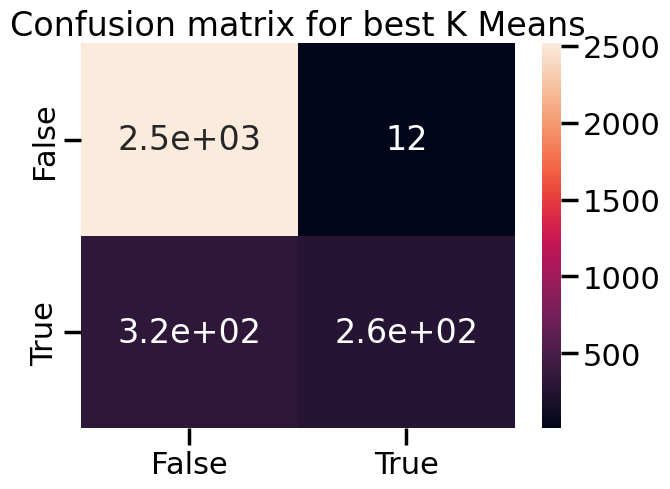

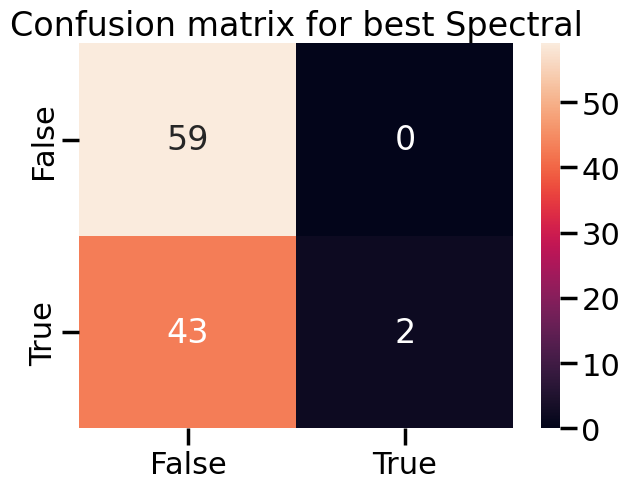

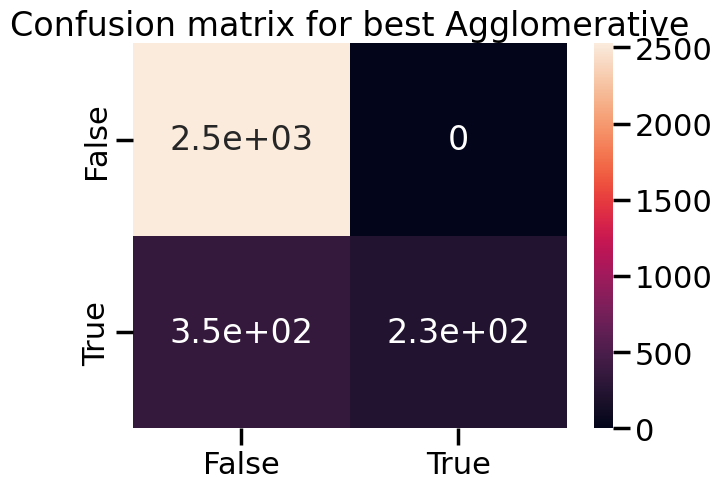

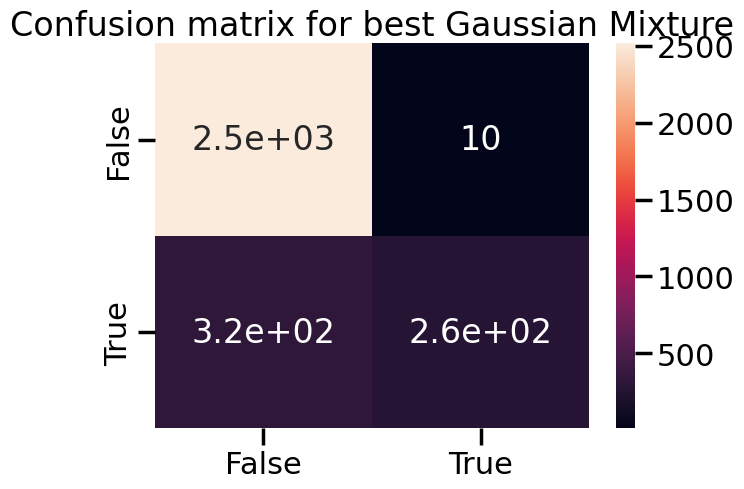

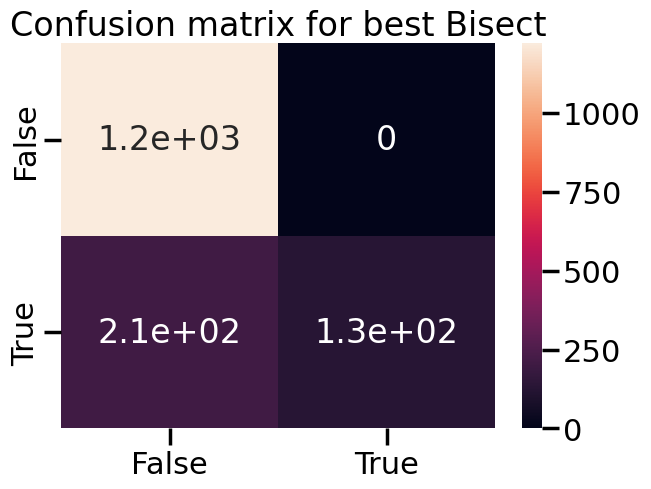

0.865681233933162

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(x1s)
# Define clustering algorithms
kmeans = KMeans(n_clusters=2, random_state=42)
# Fit and predict using each algorithm
kmeans_labels = kmeans.fit_predict(X)
match_percentage(kmeans_labels, y1s, "K Means", True)

scaler = StandardScaler()
X = scaler.fit_transform(x30s)
spectral = SpectralClustering(n_clusters=2)
spectral_labels = spectral.fit_predict(X)
match_percentage(spectral_labels, y30s, "Spectral", True)

scaler = StandardScaler()
X = scaler.fit_transform(x1s)
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X)
match_percentage(agglo_labels, y1s, "Agglomerative",  True)

gm = GaussianMixture(n_components=2, random_state=0)
gm_labels = gm.fit_predict(X)
match_percentage(gm_labels, y1s, "Gaussian Mixture", True)

scaler = StandardScaler()
X = scaler.fit_transform(x2s)
bisect_means = BisectingKMeans(n_clusters=2, random_state=0)
bisect_labels = bisect_means.fit_predict(X)
match_percentage(bisect_labels, y2s, "Bisect", True)

poly


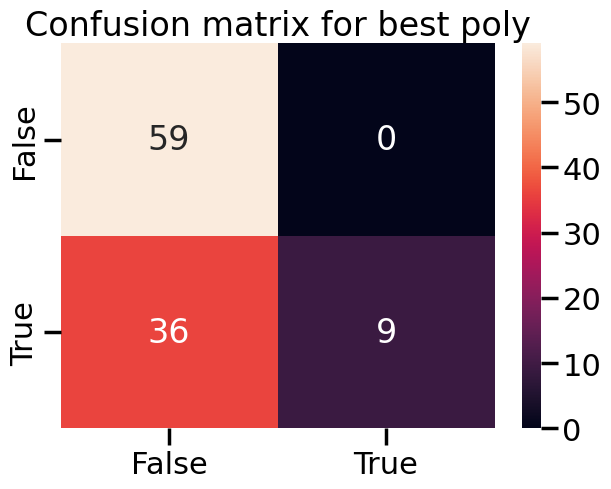

linear


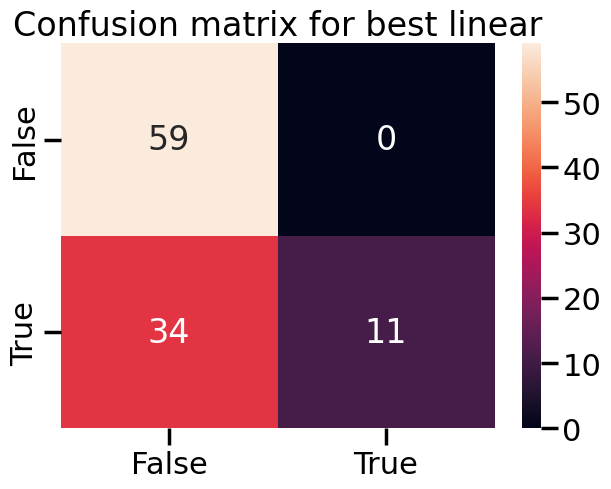

sigmoid


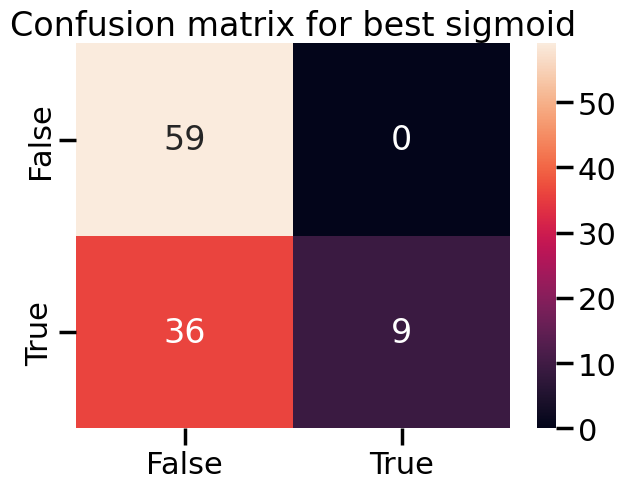

laplacian


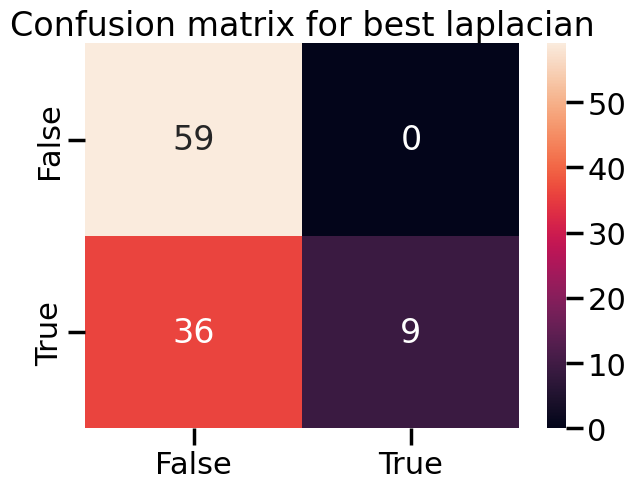

cosine


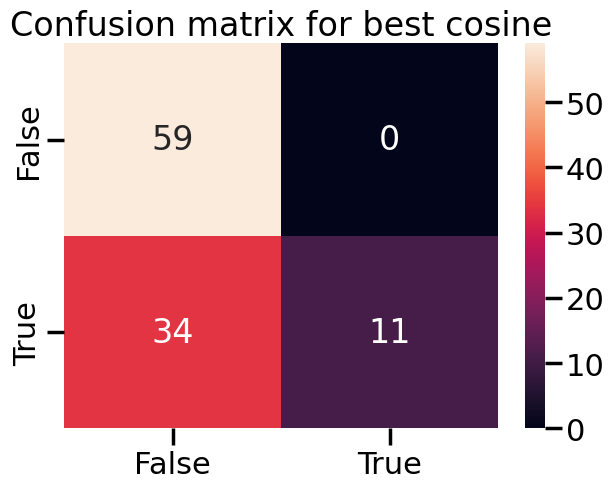

nearest_neighbors


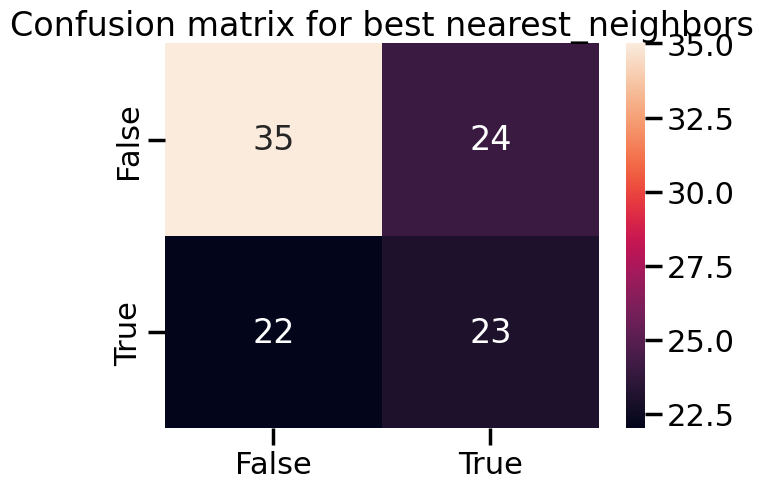

polynomial


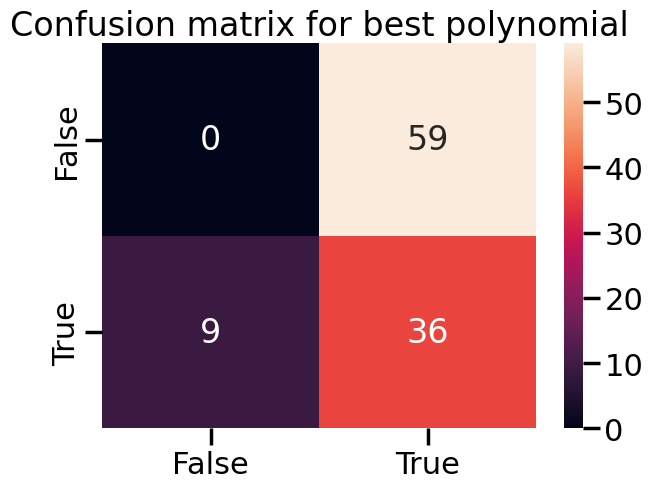

rbf


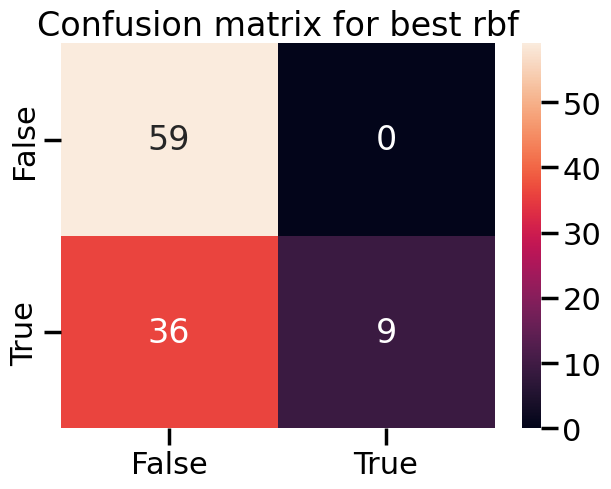

chi2


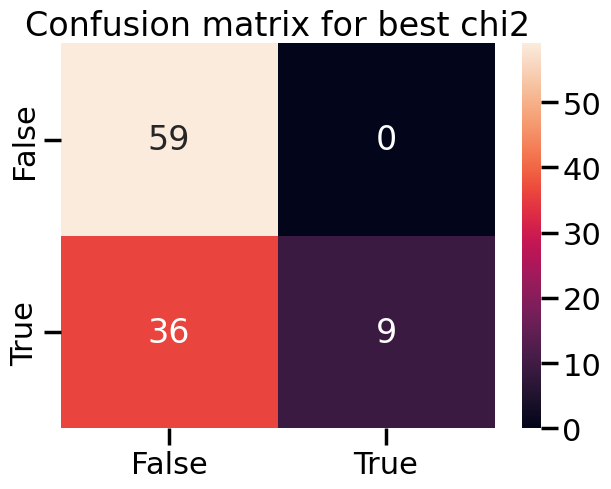

[[0.5094339622641509,
  0.5094339622641509,
  0.5094339622641509,
  0.37735849056603776,
  0.6981132075471698],
 [0.6285714285714286,
  0.5142857142857142,
  0.6285714285714286,
  0.37142857142857144,
  0.6285714285714286],
 [0.6923076923076923,
  0.5865384615384616,
  0.6923076923076923,
  0.6923076923076923,
  0.5192307692307693],
 [0.25961538461538464,
  0.6538461538461539,
  0.7403846153846154,
  0.7403846153846154,
  0.40865384615384615],
 [0.7788461538461539,
  0.6955128205128205,
  0.7788461538461539,
  0.7788461538461539,
  0.6955128205128205],
 [0.8298555377207063,
  0.7512038523274478,
  0.8298555377207063,
  0.17014446227929375,
  0.8298555377207063],
 [0.865681233933162,
  0.7904884318766067,
  0.8650385604113111,
  0.865681233933162,
  0.865681233933162],
 [0.8934320669671604,
  0.819703799098519,
  0.8876368319381842,
  0.8947198969735994,
  0.4565357372826787],
 [0.22115384615384615],
 [0.7788461538461539],
 [0.7788461538461539],
 [0.7788461538461539],
 [0.52884615384615

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def evaluateAffinity():
	affinity = ['poly', 'linear', 'sigmoid', 'laplacian', 'cosine', 'nearest_neighbors', 'polynomial', 'rbf', 'chi2']
	#scaler = StandardScaler()
	#X = scaler.fit_transform(x60s)
	scaler = MinMaxScaler()
	X = scaler.fit_transform(x30s)
	#X = scaler.transform(X)
	for af in affinity:
		results = []
		print(af)
		# Scale the data to have zero mean and unit variance
		spectral = SpectralClustering(n_clusters=2, affinity=af)
		spectral_labels = spectral.fit_predict(X)
		results.append(match_percentage(spectral_labels, y30s, alg=str(af), graph=True ))
		performance.append(results)
	return(performance)
evaluateAffinity()

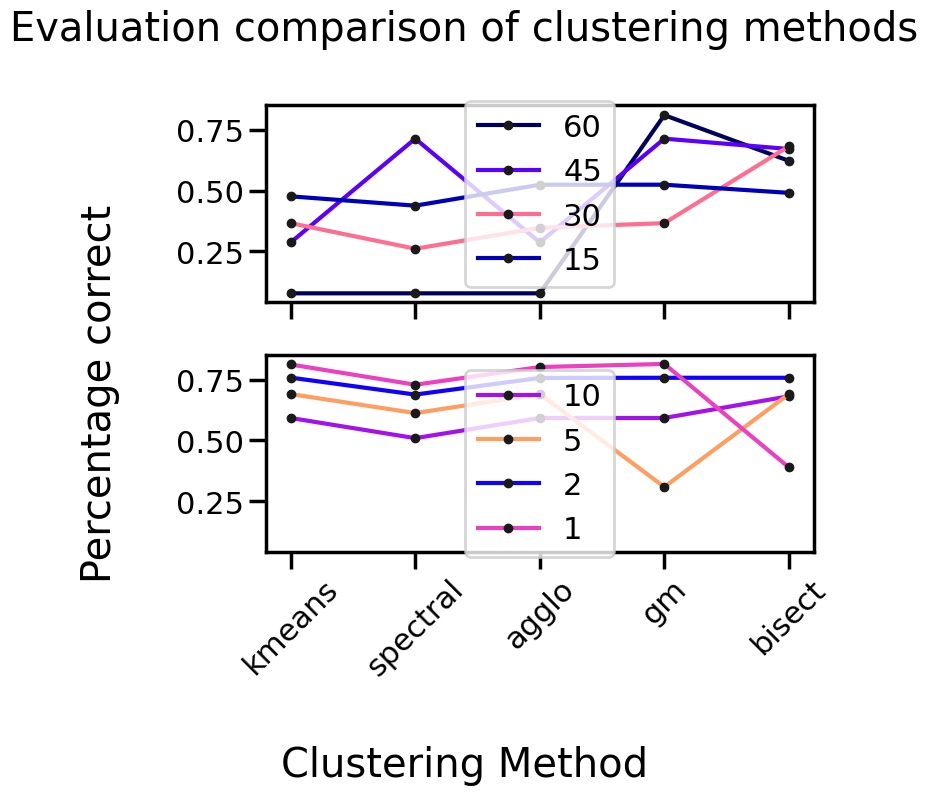

In [19]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(8,8))
x =np.arange(1, len(methods)+1).tolist()
axs[0].plot(x, performance[0], color=color1[1],ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, performance[1], color=color1[4], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, performance[2], color=color1[7], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, performance[3], color=color1[2], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, performance[4], color=color1[5], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, performance[5], color=color1[8], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, performance[6], color=color1[3], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, performance[7], color=color1[6], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
#axs[2].plot(x, performance[8], color=color1[9], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')

axs[0].legend(size_times[:4])
axs[1].legend(size_times[4:])
#axs[2].legend(size_times[6:])
plt.xticks(x, methods, rotation=45)

fig.supxlabel('Clustering Method')
fig.supylabel("Percentage correct")
fig.suptitle('Evaluation comparison of clustering methods')
fig.tight_layout()